**Spaceship Titanic**

In this notebook, I will be exploring the dataset of the Titanic spaceship.

My goal is to predict which passengers were transported to an alternate dimension after a spaceship collision.

I will be using scikit-learn pipelines and RandomForestClassifier.

The accuracy score of my model was 79.1%. Given the complexity of the task and the incompleteness of the dataset, I believe that this is a good result.

**Dataset Description was taken from Kaggle**

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp 
where gggg indicates a groupthe passenger is travelling with and pp is their number within the group.
People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation 
for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side,
where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each
of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension.
This is the target, the column you are trying to predict.

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load data**

In [2]:
train_df = pd.read_csv('train_spaceship_titanik.csv')

**Data analysis**

In [3]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_df.shape

(8693, 14)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Let's find out how many passengers were transported to another dimension

In [8]:
train_df.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported'>

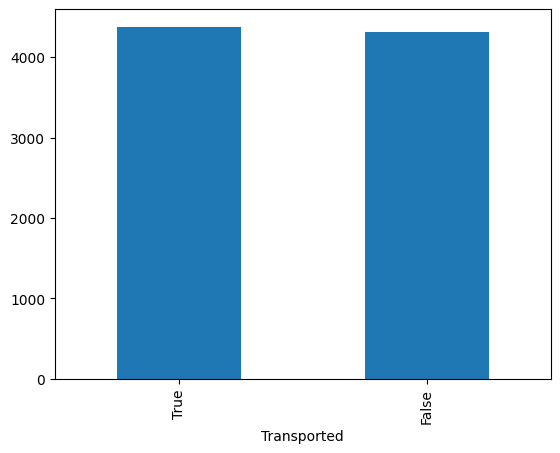

In [9]:
train_df.Transported.value_counts().plot(kind="bar")


**AGE**

In [10]:
train_df[['Age']].describe()

,Age
count,8514.000000
mean,28.827930
std,14.489021
min,0.000000
25%,19.000000
50%,27.000000
75%,38.000000
max,79.000000


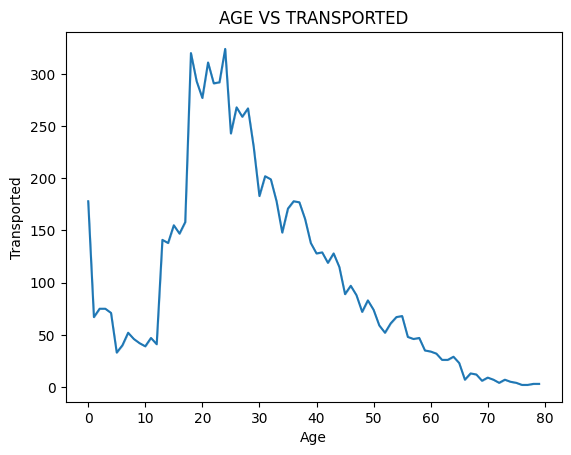

In [11]:
sns.lineplot(data=train_df, y='Transported', x='Age', estimator=len)
plt.title('AGE VS TRANSPORTED')
plt.show() 

From this graph, we can conclude that most of the transported passengers were between 20 and 30 years old.

**HOME PLANET**

In [12]:
train_df[['HomePlanet']].describe()

,HomePlanet
count,8492
unique,3
top,Earth
freq,4602


In [13]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

<Axes: xlabel='HomePlanet', ylabel='count'>

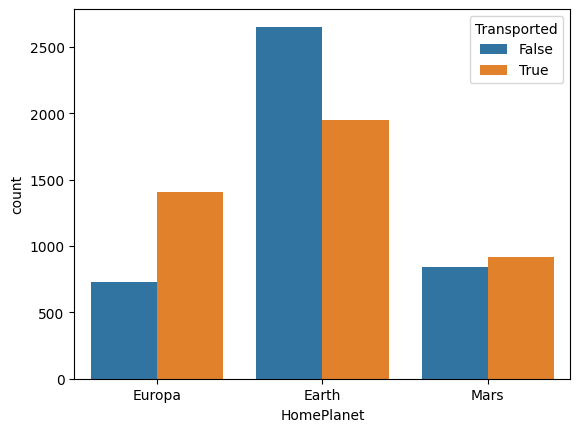

In [14]:
sns.countplot(data=train_df, x="HomePlanet", hue="Transported")

**CRYO SLEEP**

In [15]:
train_df[['CryoSleep']].describe()

,CryoSleep
count,8476
unique,2
top,False
freq,5439


<Axes: xlabel='CryoSleep', ylabel='count'>

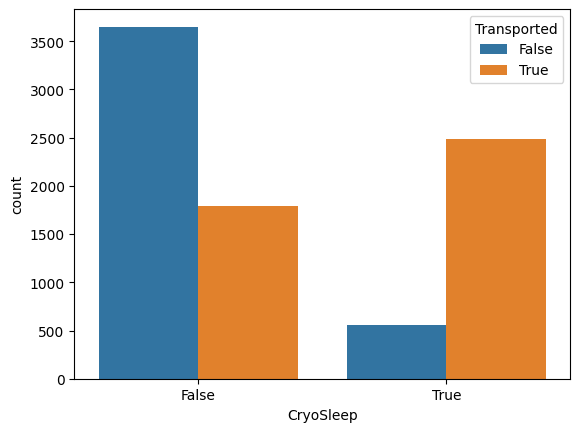

In [16]:
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')

Sleepers were transported more often than non-sleepers

**DESTINATION**

In [17]:
train_df[['Destination']].describe()

,Destination
count,8511
unique,3
top,TRAPPIST-1e
freq,5915


<Axes: xlabel='Destination', ylabel='count'>

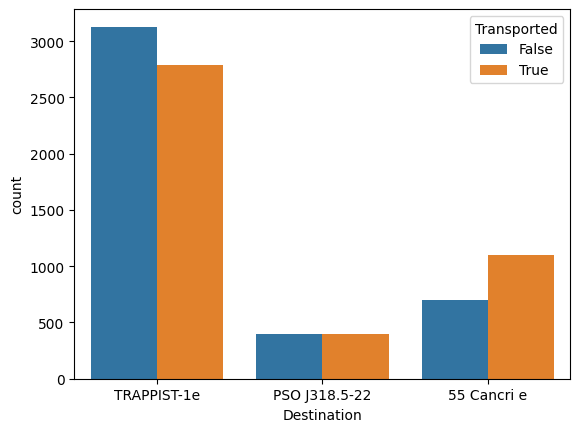

In [18]:
sns.countplot(data=train_df, x='Destination', hue='Transported')

**VIP**

In [19]:
train_df[['VIP']].describe()

,VIP
count,8490
unique,2
top,False
freq,8291


<Axes: xlabel='VIP', ylabel='count'>

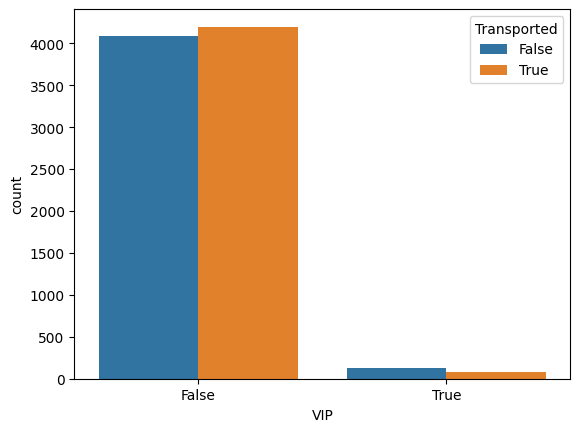

In [20]:
sns.countplot(data=train_df, x='VIP', hue='Transported')

<Axes: >

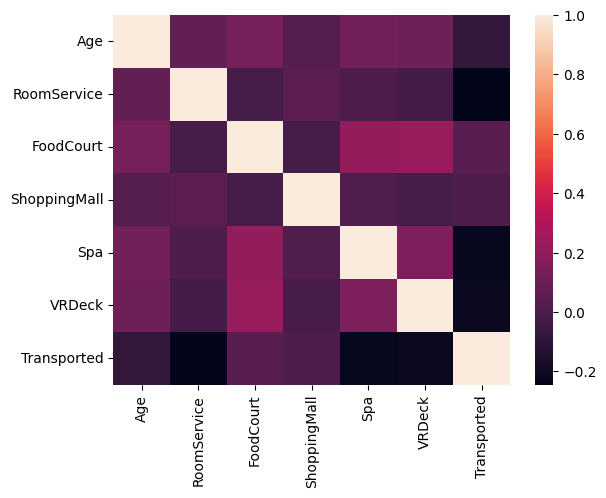

In [21]:
sns.heatmap(train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', \
                      'Spa', 'VRDeck', 'Transported']].corr())

**Prepare the dataset**

Adding new columns about the cabin

In [22]:
train_df[['Cabin_Deck', 'Cabin_Num', 'Cabin_Side']]  = train_df['Cabin'].str.split('/', expand = True)

Drop unnecessary columns

In [23]:
train_df = train_df.drop(['Cabin', 'Name', 'PassengerId'], axis=1)

Filling gaps in dataset with mean and mode

In [24]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])
train_df['Destination'] = train_df['Destination'].fillna(train_df['Destination'].mode()[0])
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0])
train_df['RoomService'] = train_df['RoomService'].fillna(train_df['RoomService'].mean())
train_df['FoodCourt'] = train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean())
train_df['ShoppingMall'] = train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean())
train_df['Spa'] = train_df['Spa'].fillna(train_df['Spa'].mean())
train_df['VRDeck'] = train_df['VRDeck'].fillna(train_df['VRDeck'].mean())
train_df['Cabin_Deck'] = train_df['Cabin_Deck'].fillna(train_df['Cabin_Deck'].mode()[0])
train_df['Cabin_Num'] = train_df['Cabin_Num'].fillna(train_df['Cabin_Num'].mode()[0])
train_df['Cabin_Side'] = train_df['Cabin_Side'].fillna(train_df['Cabin_Side'].mode()[0])

In [25]:
train_df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Cabin_Deck      0
Cabin_Num       0
Cabin_Side      0
dtype: int64

Let's convert data types

In [26]:
train_df['Transported'] = train_df['Transported'].astype(int)
train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'] = train_df['VIP'].astype(int)

In [27]:
train_df.select_dtypes("object").columns

Index(['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Num', 'Cabin_Side'], dtype='object')

In [28]:
train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side'] \
                          ,  drop_first=True).astype(int)

In [29]:
train_df['Cabin_Num'] = train_df['Cabin_Num'].astype(int)

In [30]:
train_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Num,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_S
0,0,39,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24,0,109,9,25,549,44,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58,1,43,3576,0,6715,49,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16,0,303,70,151,565,2,1,1,...,0,1,0,0,0,0,1,0,0,1


**Predictive Modelling**

1)Split the dataset to training and validation sets
2)Find the best hyperparatemers using GridSearchCV
3)Fit the RandomForestClassifier using those hyperparapeters
4)Evaluate model using accuracy score

In [31]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [32]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
rf = RandomForestClassifier(criterion='entropy', random_state=0)

In [34]:
parametrs = {'n_estimators' : range(70, 110, 10), 'max_depth' : range(5, 14)}
search = GridSearchCV(rf, parametrs, cv=5)
search.fit(X_train, y_train)
best_tree = search.best_estimator_

In [37]:
best_tree

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=80,
                       random_state=0)

In [38]:
y_pred = best_tree.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.7912164517253398